# Python

### Question: 1

Write an efficient algorithm that searches for a value target in an m x n integer matrix.  
This matrix has the following properties:

Integers in each row are sorted from right to left.

The first integer of each row is greater than the last integer of the previous row.

Example-: 

Input: matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3

Output: True

In [111]:
def find_val(matrix, target):
    for i in range(0,len(matrix)):
        if target > matrix[i][0]:
            return bool(matrix[i].count(target))

In [112]:
find_val(matrix = [[1,3,5,7],[10,11,16,20],[23,30,34,60]], target = 3)

True

### Question: 2

Write a program that takes a string as input, and counts the frequency of each word in the string, there might  be repeated characters in the string. Your task is to find the highest frequency and returns the length of the  highest-frequency word. 

Note - You have to write at least 2 additional test cases in which your program will run successfully and provide  an explanation for the same.  

Example input - string = “write write write all the number from from from 1 to 100” 

Example output - 5 

Explanation - From the given string we can note that the most frequent words are “write” and “from” and  the maximum value of both the values is “write” and its corresponding length is 5 

In [113]:
def find_frequent_word_len(inp_str):
    str_lst = inp_str.split(' ')
    frequent_word = ''
    freq_count = 0

    for i in set(str_lst):
        count = str_lst.count(i)

        if count > freq_count:
            freq_count = count
            frequent_word = i

    return len(frequent_word)

In [114]:
val = find_frequent_word_len("write write write all the number from from from 1 to 100")
print(val)

5


**Test case 1:**

In [115]:
val = find_frequent_word_len("bit a bit have a bit but just have a small bit")
print(val)

3


Here, the word "bit" is repeated 4 times, and has a length of 3, and so the output.

**Test case 2:**

In [116]:
val = find_frequent_word_len("a box is a box that is a box and also have a box within a")
print(val)

1


Here, the word "a" is repeated 5 times, and has a length of 1, and so the output.

# Machine Learning

### Question: 1

Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. 

#### **Import Libraries**

In [117]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#### **Data Ingestion**

In [118]:
df = pd.read_csv("datasets/instagram_reach.csv")
df.head()

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30


#### **Data Preprocessing**

In [119]:
df.shape

(100, 8)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [121]:
# Remove unwanted columns
df = df.drop(['Unnamed: 0','S.No'], axis=1)
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [122]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [123]:
df.isna().sum()

USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

There are just 6 missing values in **Caption** Feature,  
we can ignore this mssing values, as the caption totaly depends on the person post the photo. 

In [124]:
df.duplicated().sum()

0

There are no duplicate records

In [125]:
df['Time since posted'].head()

0    11 hours
1     2 hours
2     2 hours
3     3 hours
4     3 hours
Name: Time since posted, dtype: object

The column 'Time since posted' is a string column,  
as its the target column, we need to convert this column to int type.  
to do so, we need to extract only the numeric value form the column and dump the string value.

In [126]:
df['Time since posted'] = df['Time since posted'].str.extract('(\d+)').astype(int)

In [127]:
df['Time since posted'].head()

0    11
1     2
2     2
3     3
4     3
Name: Time since posted, dtype: int32

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    int32 
 5   Likes              100 non-null    int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 4.4+ KB


#### **EDA**

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    int32 
 5   Likes              100 non-null    int64 
dtypes: int32(1), int64(2), object(3)
memory usage: 4.4+ KB


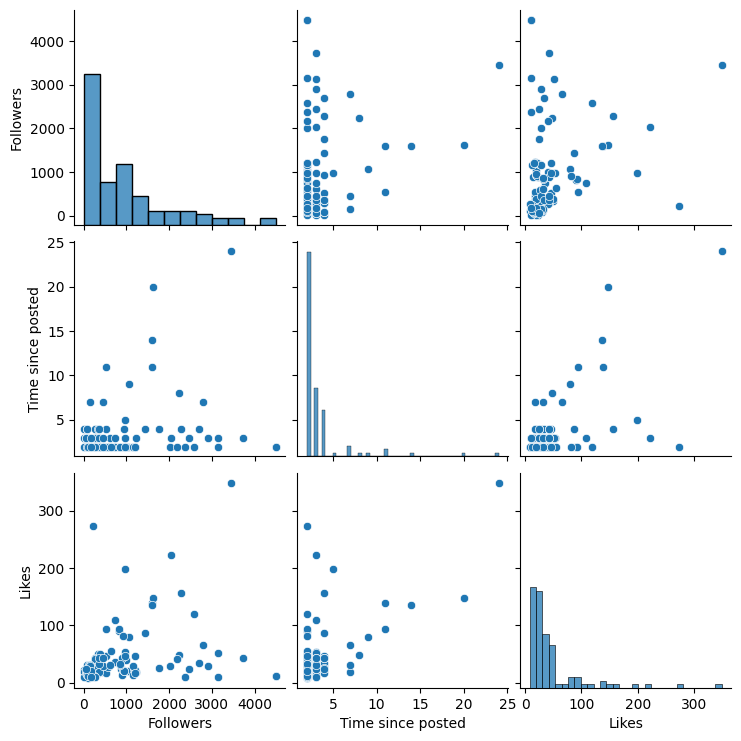

In [130]:
sns.pairplot(df)

#### **Encoding**

In [131]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [132]:
# Split data into X_train, X_test, y_like_train, y_like_test, y_time_posted_train, y_time_posted_test 

X = df.drop(['Time since posted','Likes'], axis=1)
y_like = df['Likes']
y_time_posted = df['Time since posted']

X_train, X_test, y_like_train, y_like_test, y_time_posted_train, y_time_posted_test = train_test_split(X, 
                                                                                                       y_like, 
                                                                                                       y_time_posted, 
                                                                                                       test_size=0.25,
                                                                                                       random_state=55)



In [133]:
X_train.head()

,USERNAME,Caption,Followers,Hashtags
56,big.data.hush,"Recently, computer scientists have been workin...",530,#bitcoin #ethereum #BTC#fun #Profit #success #...
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...
36,bitpainting,"At 12 Noon EST today, BitPainting will be rele...",835,#blockchain #ethereum
81,ah_studio_,Hatsu Veggie Milk 🎯 Ref 02. Piece O1 - 03,888,#hatsu #hatsulovers #design #artdirection#setd...
47,_ehab.othman_,"""If you can imagine it, you can create it & if...",3139,#worldcode #coding#python #codeaholics #rstudi...


In [134]:
X_train.shape

(75, 4)

In [135]:
X_test.shape

(25, 4)

In [136]:
y_like_train.head()

56    17
97    10
36    93
81    43
47    51
Name: Likes, dtype: int64

In [137]:
y_like_train.shape

(75,)

In [138]:
y_like_test.shape

(25,)

In [139]:
y_time_posted_train.head()

56    2
97    3
36    2
81    2
47    3
Name: Time since posted, dtype: int32

In [140]:
y_time_posted_train.shape

(75,)

In [141]:
# Enocode the categorical columns

X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

# Create an instance of LabelEncoder
encoder = LabelEncoder()


for col in X_train_copy.columns:
    X_train_copy[col] = encoder.fit_transform(X_train_copy[col])
    

for col in X_test_copy.columns:
    X_test_copy[col] = encoder.fit_transform(X_test_copy[col])

In [142]:
X_train.head()

,USERNAME,Caption,Followers,Hashtags
56,big.data.hush,"Recently, computer scientists have been workin...",530,#bitcoin #ethereum #BTC#fun #Profit #success #...
97,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...
36,bitpainting,"At 12 Noon EST today, BitPainting will be rele...",835,#blockchain #ethereum
81,ah_studio_,Hatsu Veggie Milk 🎯 Ref 02. Piece O1 - 03,888,#hatsu #hatsulovers #design #artdirection#setd...
47,_ehab.othman_,"""If you can imagine it, you can create it & if...",3139,#worldcode #coding#python #codeaholics #rstudi...


In [143]:
X_train_copy.head()

,USERNAME,Caption,Followers,Hashtags
56,12,51,30,25
97,24,63,16,29
36,14,15,38,27
81,2,27,42,48
47,0,0,68,70


#### **Train the model**

##### For Likes target column

In [144]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_copy, y_like_train)

# Predict 
like_pred = linear_reg.predict(X_test_copy)

In [145]:
# Find the error 
mse = mean_squared_error(y_like_test, like_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_like_test, like_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 4677.025802249186
Root Mean Squared Error (RMSE): 68.38878418461017
R-squared (R²): -0.20910567164614124


##### For Time Since Posted

In [146]:
linear_reg = LinearRegression()

linear_reg.fit(X_train_copy, y_time_posted_train)

# Predict 
time_pos_pred = linear_reg.predict(X_test_copy)

In [147]:
# Find the error 
mse = mean_squared_error(y_time_posted_test, time_pos_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_time_posted_test, time_pos_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 1.5855309644869033
Root Mean Squared Error (RMSE): 1.259178686480558
R-squared (R²): -0.32127580373908615


### Question: 2

1. Explain how you can implement ML in a real world application.

* Implementing a ML model in real world is a ongoing process.
* There are several step involved while implementing ML in real worlds. The steps include:
    1. Define the problem:
        * Understand the problem statement and define the problem.
        * indefity the type of ML prblem, classification or regression problem.
    2. Data Collection
        * Once the problem statement is defind collect the required data.
        * In some cases you may also need to generate data.
    3. Perform EDA (Exploratory data analysis)
        * One of the most important step while implementing ML is EDA.
        * its helps to understand data and identify the hidden pattern it the data.
    3. Feature selection
        * once you got insights about data, select the relevent features for the model training.
        * Having too many features can confuse the ML model and can mislead the model.
        * also having too less features can not train the model as expected.
        * there shoud be a balance between the number of models you are selecting.
    4. Model Training:
        * once all the features are selected. find the appropriate model, that you want to use.
        * choosing a right model is important, as Each ML model has its own use cases.
    5. Evaluate the model:
        * Once the model is trained, evaluate the model by validating it.
        * If the model is perofrming poor, find for any improvement in feature selection and retrain model.
    6. Monitor and Maintain:
        * Once we get a model with good accuracy, the next step is to monitor the model performace.

